# Student Performance Indicator

#### Life Cycle of a Machine Learning Project
- Understand Problem Statement
- Data Collection
- Performing Data Checks
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
-Choosing best model

#### Problem Statement:
- The project understands how the student test scores are affected by various factors such as Gender, Ethnicity, Parents Education Level, Lunch and Test Preparation scores.

In [1]:
#importing the required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the data and checking the first few rows

In [2]:

df = pd.read_csv("data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### checking the shape of the data:

In [3]:
df.shape

# the dataset has 1000 rows and 8 columns.

(1000, 8)

#### Dataset Information:

##### The dataset has the following variables:

- gender
- ethnicity
- parents level of education
- lunch
- test preparation score
- math score
- reading score
- writing score


#### Data Checks needed to be performed:

- Missing Values
- Duplicates
- Data Type
- Number of Unique values
- Check Data Statistics
- Various Categories in Categorical Columns

##### Checking Missing Values

In [4]:
df.isna().sum()

# none of the columns have missing values:

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Checking Duplicates

In [5]:
df.duplicated().sum()

# there are no duplicates in the dataset.

0

##### Checking the data type of each column

In [6]:
df.info()

# there are 5 categorical columns and 3 numeric columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking the unique values of each columns:

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Checking Data stats:

In [8]:
df.describe()

# all the scores have approximately similar mean values
# all the scores have approximately similar standard deviation
# Only math has a minimum score of zero

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Exploring our data further to gain more insights:

In [9]:
# Exploring all the categorical variables:

print("Categories in the gender variable: ",end=" ")
print(df['gender'].unique())
print()

print("Categories in the race/ethnicity variable: ",end=" ")
print(df['race/ethnicity'].unique())
print()

print("Categories in the parental level of education variable: ",end=" ")
print(df['parental level of education'].unique())
print()

print("Categories in the lunch variable: ",end=" ")
print(df['lunch'].unique())
print()

print("Categories in the test preparation course variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in the gender variable:  ['female' 'male']

Categories in the race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in the parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in the lunch variable:  ['standard' 'free/reduced']

Categories in the test preparation course variable:  ['none' 'completed']


In [10]:
# separating data as categorical and numerical:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("The numeric columns are: ",numeric_features)
print("The categorical columns are: ",categorical_features)

The numeric columns are:  ['math score', 'reading score', 'writing score']
The categorical columns are:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding 'Total Score' and 'Average' columns to our dataset

In [11]:
# The adding of columns and average is calculated in done, so that if we want, we can predict the total and average as well
# using our machine learning regression model.

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3

# checking if the required columns have been added
df.head()

# the required scores have been added.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
# Checking the number of students getting full marks in each of the subjects:
writing_full = df[df['writing score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print('Number of students with full marks math:',math_full)
print('Number of students with full marks reading:',reading_full)
print('Number of students with full marks writing:',writing_full)


Number of students with full marks math: 7
Number of students with full marks reading: 17
Number of students with full marks writing: 14


In [13]:
# Checking the number of students getting less than 20 marks in each of the subjects:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()


print('Number of students with less than 20 marks math:',math_less_20)
print('Number of students with less than 20 marks reading:',reading_less_20)
print('Number of students with less than 20 marks writing:',writing_less_20)

Number of students with less than 20 marks math: 4
Number of students with less than 20 marks reading: 1
Number of students with less than 20 marks writing: 3


- We can say that, students perform worse in math.
- We can say it because, students with full marks in math are the least and students with less than 20 marks are the highest in math

#### Data Visualization

- Univariate Analysis and Bi-Variate Analysis

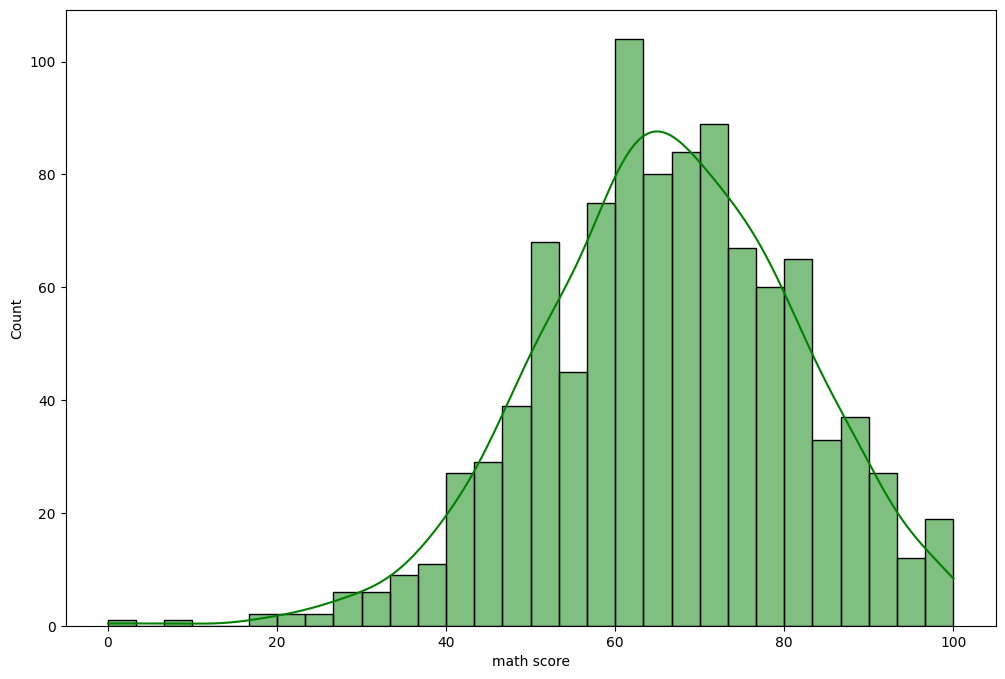

In [14]:
# As we will be predicting the math score, we will first check the distribution of that variable.
# Also, we shall check, whether each of the categorical variables has any impact on the math score variable.

plt.figure(figsize=(12,8))
sns.histplot(data=df,x='math score',bins=30,kde=True,color='g')
plt.show()

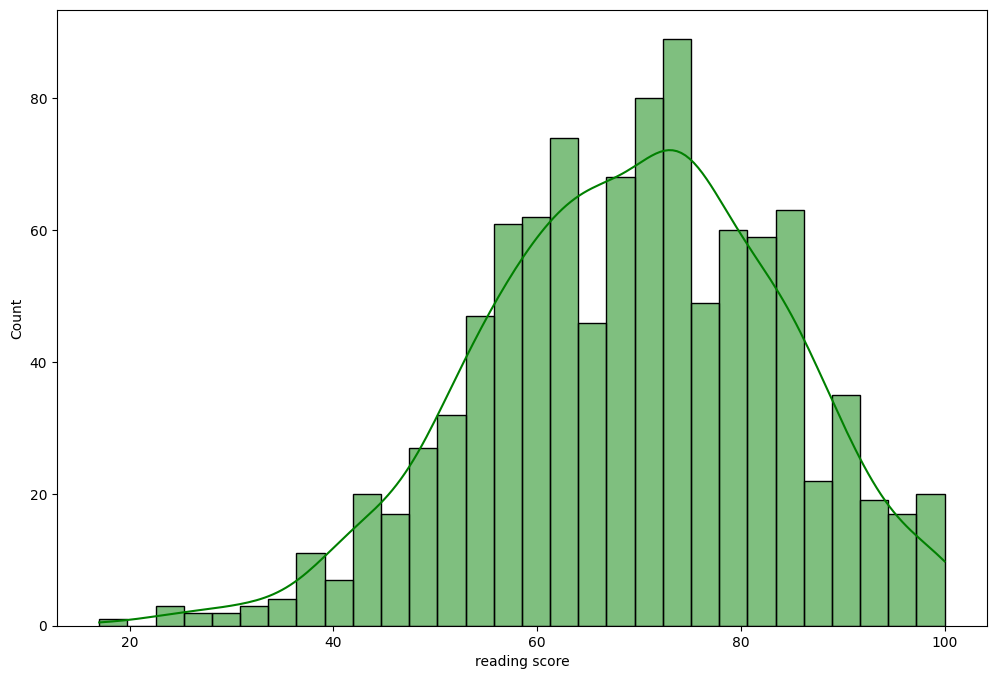

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='reading score',bins=30,kde=True,color='g')
plt.show()

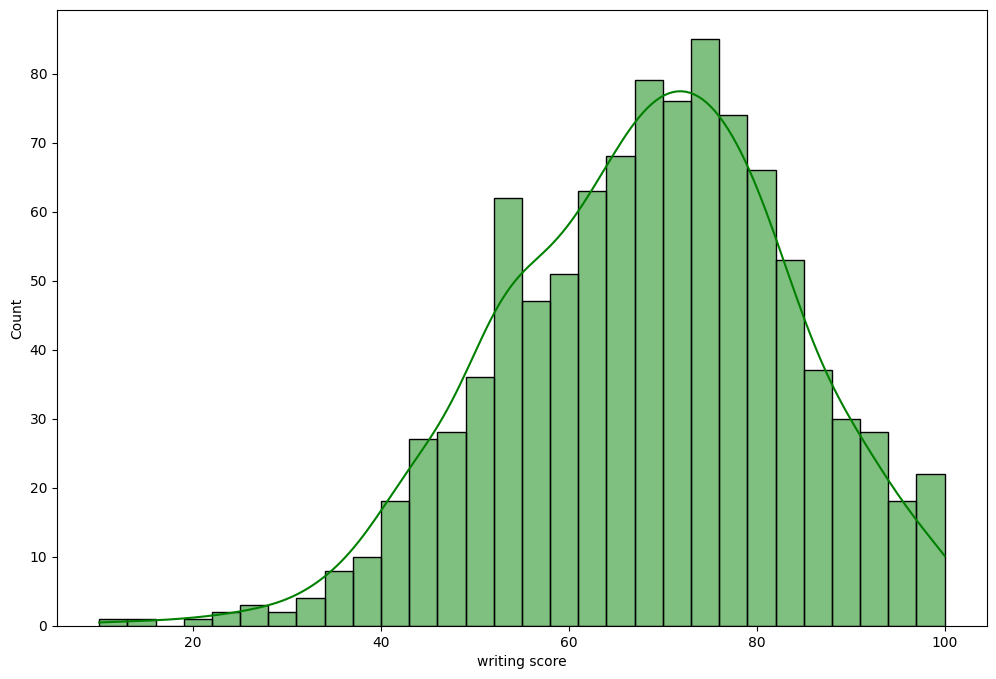

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='writing score',bins=30,kde=True,color='g')
plt.show()

#### Observations:

- All the three scores are negatively skewed

#### Checking if the distribution of scores differ based on the gender:

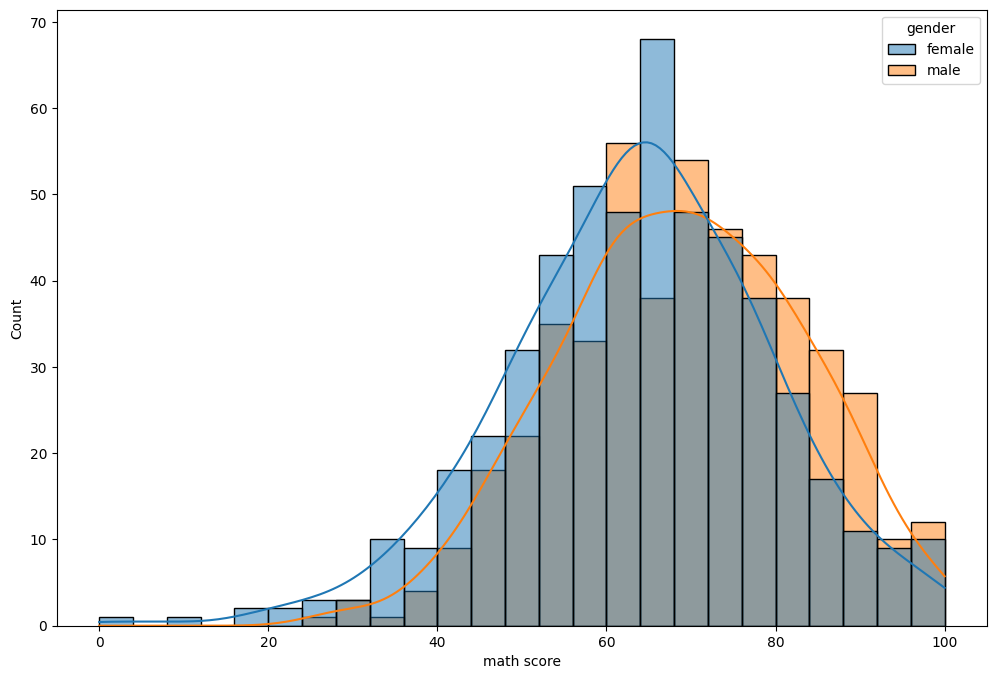

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='math score',kde=True,hue='gender')
plt.show()

#### Checking if the distribution of scores differ based on the race/ethnicity:

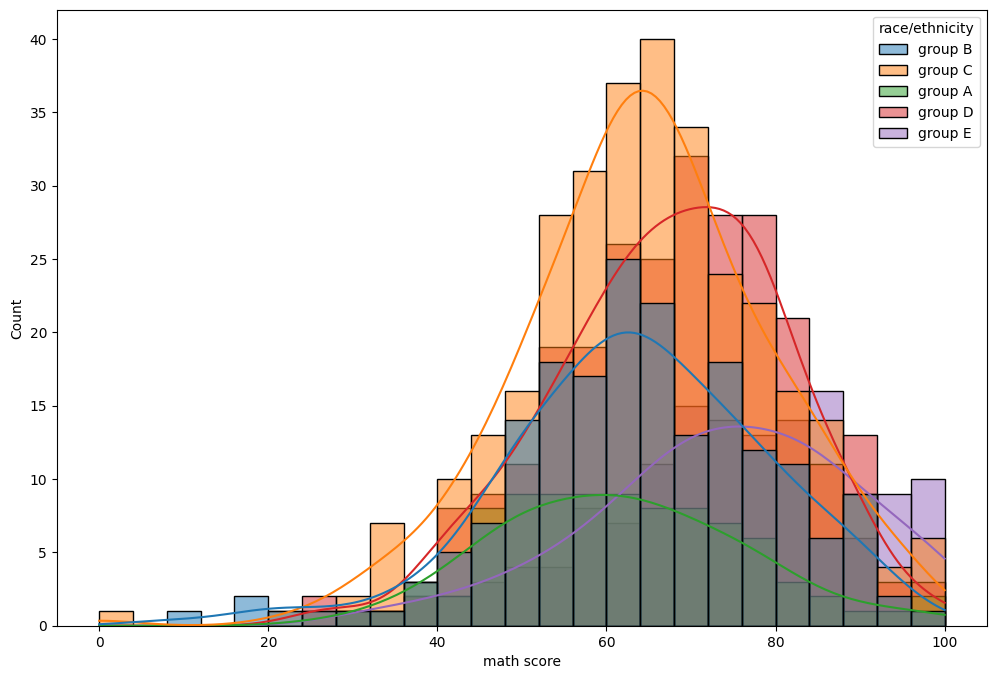

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='math score',kde=True,hue='race/ethnicity')
plt.show()

#### Checking if the distribution of scores differ based on the parental level of education:

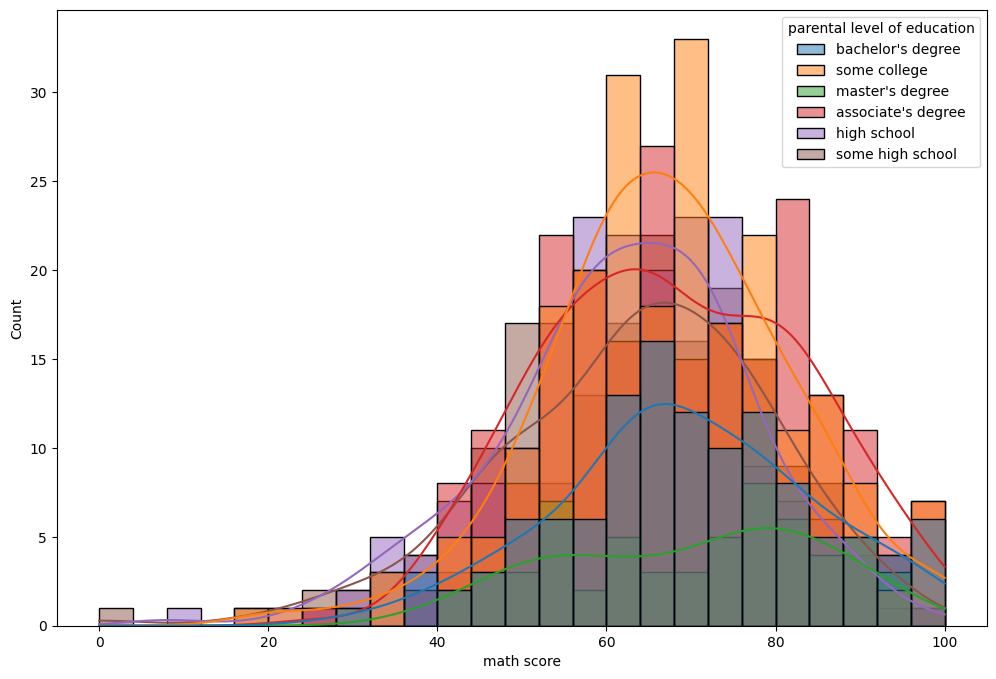

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='math score',kde=True,hue='parental level of education')
plt.show()

#### Checking if the distribution of scores differ based on the lunch:

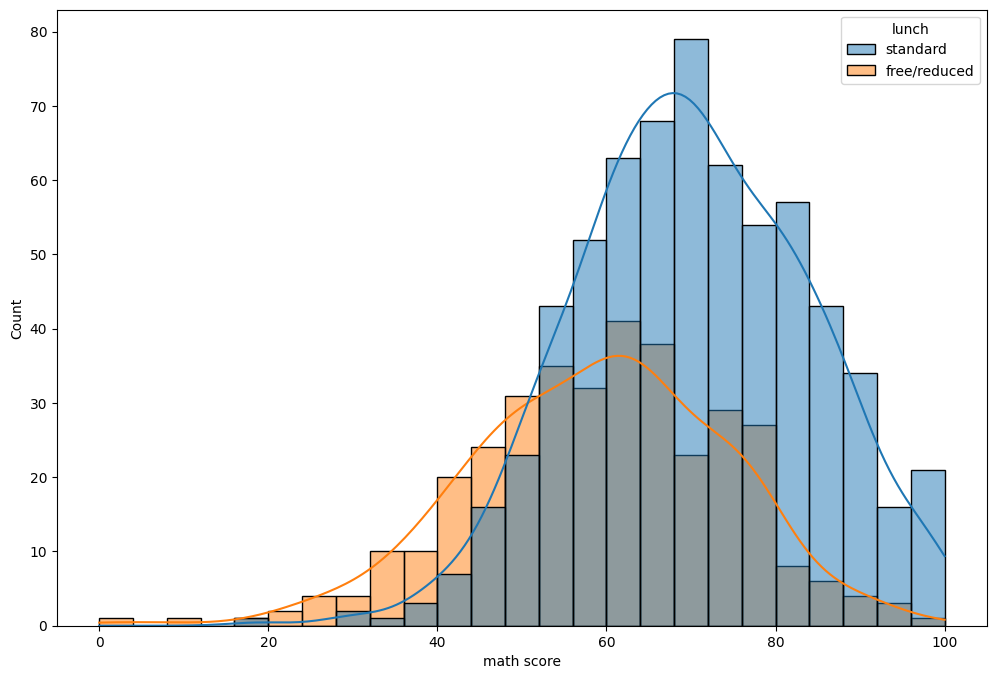

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='math score',kde=True,hue='lunch')
plt.show()

#### Checking if the distribution of scores differ based on the test preparation course:

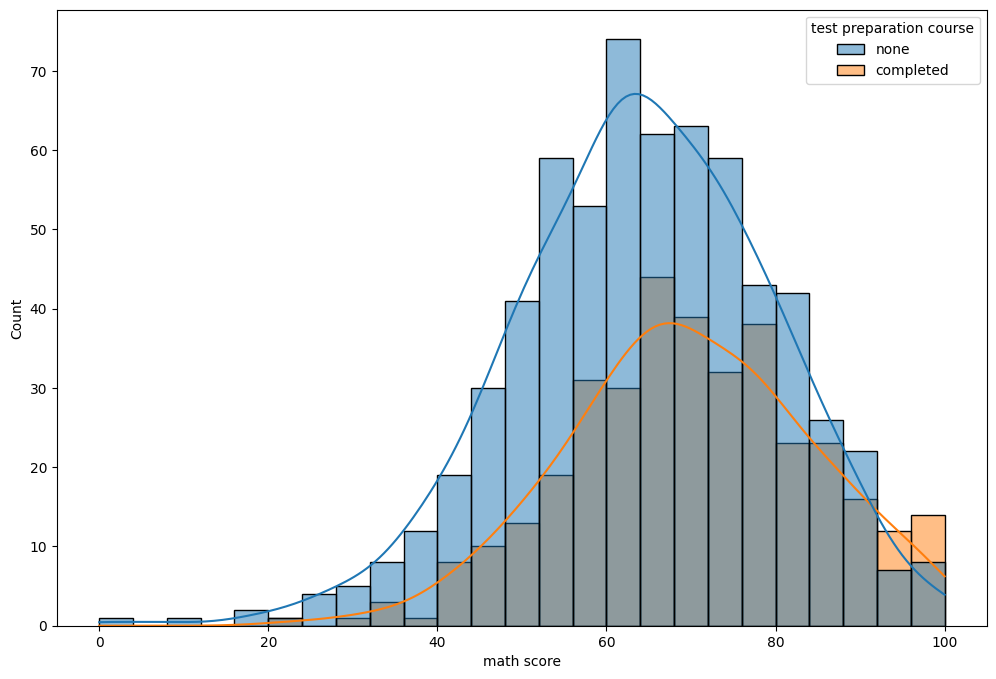

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='math score',kde=True,hue='test preparation course')
plt.show()

#### Observations:

- Based on gender, we can observe that males have the better math score than females.
- Based on race, we can say that groups D, E have a better math score than groups A, B and C.
- Students who have a degree(any) have a better math score than the rest.
- Students who take a standard lunch have a better math score than those who take free/reduced lunch
- Students who took a test preparation course, score better in math than those who did not.